In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_classifier(classifier, X, y, title=''): 
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0 
    
    mesh_step_size = 0.01 

    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),
                                 np.arange(min_y, max_y, mesh_step_size)) 
    
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()]) 
    output = output.reshape(x_vals.shape)     
    
    plt.figure() 
    plt.title(title)
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray) 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1,
                cmap=plt.cm.Paired) 
    
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 

    plt.xticks((np.arange(int(min_x), int(max_x), 1.0))) 
    plt.yticks((np.arange(int(min_y), int(max_y), 1.0))) 

    plt.show() 

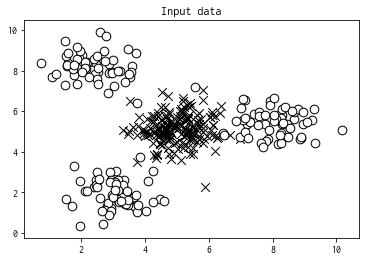

In [2]:
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',
           edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
           edgecolor='black', linewidth=1, marker='o')
plt.title('Input data')
plt.show()

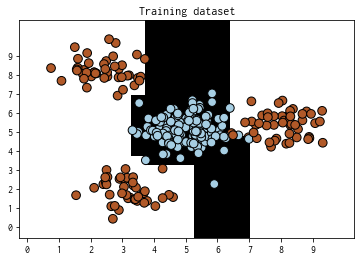

In [3]:
# データセットを訓練用と検証用に分ける
X_train, X_test, y_train, y_test = model_selection.train_test_split(
X, y, test_size=0.25, random_state=5)

params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

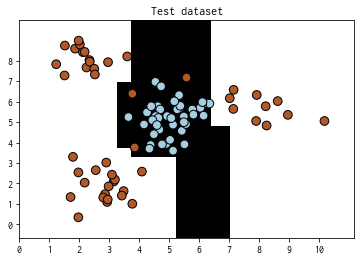

In [4]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [5]:
# 分類レポート
class_names = ['Class-0', 'Class-1']
print("Classifier pergormance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
                           target_names = class_names))

print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classifier pergormance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

   micro avg       1.00      1.00      1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

   micro avg       0.97      0.97      0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
%matplotlib inline

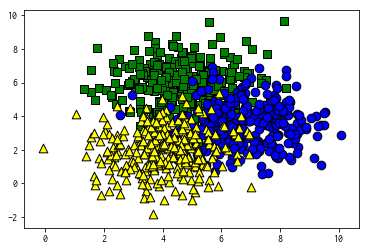

In [7]:
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='green',
           edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='blue',
           edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='yellow',
           edgecolors='black', linewidth=1, marker='^')

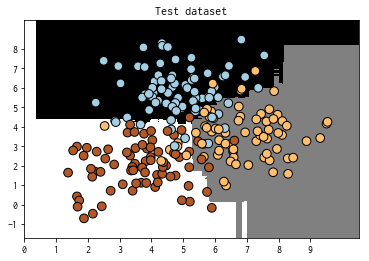

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

   micro avg       0.87      0.87      0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

   micro avg       0.87      0.87      0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
X, y, test_size=0.25, random_state=5)

params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

classifier = RandomForestClassifier(**params)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

class_names = ['Class-0', 'Class-1', 'Class-2']
print("Classifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
                           target_names=class_names))

print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


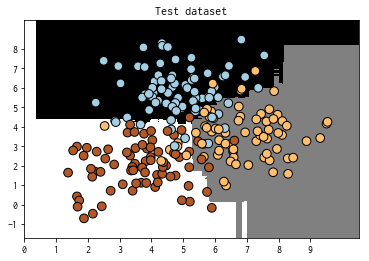

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

   micro avg       0.87      0.87      0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

   micro avg       0.87      0.87      0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [9]:
#classifier = ExtraTreesClassifier(**params)
classifier = RandomForestClassifier(**params)

classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

class_names = ['Class-0', 'Class-1', 'Class-2']
print("Classifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
                           target_names=class_names))

print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


Confidence measure:

Datapoint: [5 5]
Probabilities: [0.81427532 0.08639273 0.09933195]
Predicted class: Class-0

Datapoint: [3 6]
Probabilities: [0.93574458 0.02465345 0.03960197]
Predicted class: Class-0

Datapoint: [6 4]
Probabilities: [0.12232404 0.7451078  0.13256816]
Predicted class: Class-1

Datapoint: [7 2]
Probabilities: [0.05415465 0.70660226 0.23924309]
Predicted class: Class-1

Datapoint: [4 4]
Probabilities: [0.20594744 0.15523491 0.63881765]
Predicted class: Class-2

Datapoint: [5 2]
Probabilities: [0.05403583 0.0931115  0.85285267]
Predicted class: Class-2


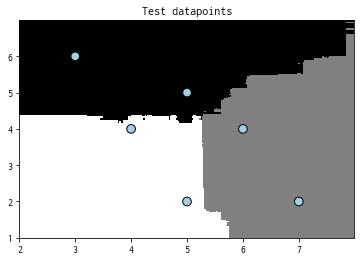

In [10]:
# p.69 3.4.2 予測の確信度の推定
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7,2], [4, 4], [5,2]])

print("Confidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Probabilities:', probabilities)
    print('Predicted class:', predicted_class)
    
visualize_classifier(classifier, test_datapoints,
                    [0]*len(test_datapoints),
                    'Test datapoints')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
%matplotlib inline

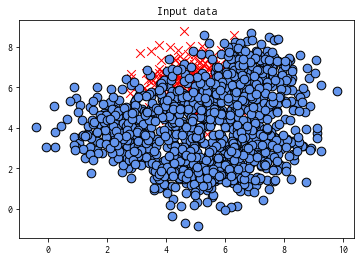

In [12]:
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='red',
            edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='cornflowerblue',
           edgecolors='black', linewidth = 1, marker='o')
plt.title('Input data')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, 
                                                                    random_state=5)
xparams = {'n_estimators': 100, 'max_depth':4, 'random_state': 0,
          'class_weight': 'balanced'
           }

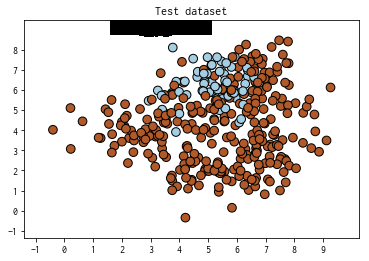

In [14]:
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [15]:
class_names = ['Class-0', 'Class-1']
print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.00      0.00      0.00        69
     Class-1       0.82      1.00      0.90       306

   micro avg       0.82      0.82      0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.73       375



/Users/nagahamanil/.pyenv/versions/3.7.2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
# p.75 3.6 グリッドサーチ
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report

In [17]:
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
X, y, test_size=0.25, random_state=5)

parameter_grid = [ {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
                 {'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}]

metrics = ['precision_weighted', 'recall_weighted']

for metric in metrics:
    print("\n#### Searching optimal parameters for", metric)
    
    classifier = model_selection.GridSearchCV(
    ExtraTreesClassifier(random_state=0),
    parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)
    
    print("\nGrid scores for parameter grid:")
    for params, avg_score in zip(classifier.cv_results_['params'],
                                classifier.cv_results_['mean_test_score']):
        print(params, '-->', round(avg_score, 3))
    
    print("\nBest parameters:", classifier.best_params_)
    
y_pred = classifier.predict(X_test)
print("\nPerformance report:\n")
print(classification_report(y_test, y_pred))


#### Searching optimal parameters for precision_weighted

Grid scores for parameter grid:
{'max_depth': 2, 'n_estimators': 100} --> 0.847
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 7, 'n_estimators': 100} --> 0.844
{'max_depth': 12, 'n_estimators': 100} --> 0.836
{'max_depth': 16, 'n_estimators': 100} --> 0.818
{'max_depth': 4, 'n_estimators': 25} --> 0.846
{'max_depth': 4, 'n_estimators': 50} --> 0.84
{'max_depth': 4, 'n_estimators': 100} --> 0.841
{'max_depth': 4, 'n_estimators': 250} --> 0.845

Best parameters: {'max_depth': 2, 'n_estimators': 100}

#### Searching optimal parameters for recall_weighted

Grid scores for parameter grid:
{'max_depth': 2, 'n_estimators': 100} --> 0.84
{'max_depth': 4, 'n_estimators': 100} --> 0.837
{'max_depth': 7, 'n_estimators': 100} --> 0.841
{'max_depth': 12, 'n_estimators': 100} --> 0.834
{'max_depth': 16, 'n_estimators': 100} --> 0.816
{'max_depth': 4, 'n_estimators': 25} --> 0.843
{'max_depth': 4, 'n_estimators': 50} --> 0.836

In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [23]:
# p.79 3.7 特徴量の相対重要度
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import model_selection
from sklearn.utils import shuffle

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [24]:
housing_data = datasets.load_boston()

In [30]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
X, y, test_size=0.2, random_state=7)

regressor = AdaBoostClassifier(DecisionTreeRegressor(max_depth=4),
                               algorithm='SAMME', 
                              n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mmse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("ADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

feature_importances = regressor.feature_importances_
feature_namems = housing_data.feature_names

feature_importances = 100 * (feature_importances / max(feature_importances))

index_sorted = np.flipud(np.argsort(feature_importances))

pos = np.arange(index_sorted.shape[0]) + 0.5

plt,figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()

TypeError: object of type 'NoneType' has no len()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.